### Sèrie climàtica Girona 1950/2022

#### Dades

1. Girona_raw.txt:

    - ppt: PRECIPITACIÓ ACUMULADA DIÀRIA (mm)
    - tx:  TEMPERATURA MÀXIMA DIÀRIA (ºC)
    - tn:  TEMPERATURA MÍNIMA DIÀRIA (ºC)
    
2. Girona_reg.csv:

    - ppt_mean: PRECIPITACIÓ DIÀRIA ACUMULADA (MM), regressió sobre la mitjana anual
    - ppt_std:  PRECIPITACIÓ DIÀRIA ACUMULADA (MM), regressió sobre la desviació standard anual
    - tx_mean:  TEMPERATURA MÀXIMA DIÀRIA (ºC), regressió sobre la mitjana anual
    - tx_std:   TEMPERATURA MÀXIMA DIÀRIA (ºC), regressió sobre la desviació standard anual
    - tn_mean:  TEMPERATURA MÍNIMA DIÀRIA (ºC), regressió sobre la mitjana anual
    - tn_std:   TEMPERATURA MÍNIMA DIÀRIA (ºC), regressió sobre la desviació standard anual


#### Exercici 1. (10 punts)

- fes una figura amb la mitjana anual i desviació standard anual, per les tres variables (6 plots)
- en cada plot sobreposa-hi (en vermell) la corresponent regressió (fitxer Girona_reg.csv)

- interpreta el resultat i comenta-ho breument

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity
import numpy as np

In [2]:
# Llegim i observem com són les dades
raw_data = pd.read_csv('girona_raw.txt', sep='\t')
data = pd.read_csv('girona_reg.csv')

In [3]:
raw_data

,ANY,MES,DIA,PPT,TX,TN
0,1950,1,1,0.0,12.7,5.2
1,1950,1,2,0.0,13.2,-2.5
2,1950,1,3,0.0,14.8,-1.8
3,1950,1,4,0.0,15.4,0.5
4,1950,1,5,0.0,15.7,-1.8
...,...,...,...,...,...,...
26658,2022,12,27,0.0,18.5,0.2
26659,2022,12,28,0.0,19.7,-0.4
26660,2022,12,29,0.0,17.0,0.6
26661,2022,12,30,0.0,17.5,4.5


In [4]:
data

,year,ppt_mean,ppt_std,tx_mean,tx_std,tn_mean,tn_std
0,1950.0,2.065474,7.458102,20.818111,6.707876,6.875507,6.637058
1,1951.0,2.074925,7.488288,20.800242,6.710414,6.851097,6.623767
2,1952.0,2.083986,7.517267,20.783738,6.713130,6.827890,6.610986
3,1953.0,2.092658,7.545039,20.768598,6.716024,6.805887,6.598713
4,1954.0,2.100940,7.571605,20.754825,6.719096,6.785088,6.586949
...,...,...,...,...,...,...,...
68,2018.0,1.820070,6.761329,22.712773,7.285170,7.957752,6.892886
69,2019.0,1.803011,6.709443,22.787733,7.299789,8.015197,6.914210
70,2020.0,1.785562,6.656350,22.864058,7.314585,8.073846,6.936043
71,2021.0,1.767723,6.602050,22.941748,7.329558,8.133698,6.958386


In [5]:
# Exemple:
raw_data.groupby('ANY')['TX'].mean()

ANY
1950    21.438082
1951    20.106301
1952    21.240984
1953    21.165753
1954    20.506849
          ...    
2018    22.548493
2019    23.038630
2020    22.624044
2021    22.284384
2022    24.051781
Name: TX, Length: 73, dtype: float64

In [6]:
def plot_mean_and_std_of(var, color):
    # Agreguem les dades per any, després, n'agafem nomès la columna que volguem mostrar i en fem la mitjana i la std
    annual_mean_tx = raw_data.groupby('ANY')[var].mean()
    annual_std_tx = raw_data.groupby('ANY')[var].std()
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    # Per anar a buscar la columna del csv, hem de pasar el valor a lower case i concatenar el string '_mean o _std'
    # Això s'ha de fer així perquè els noms de les columnes són aquests.
    regression_name_mean = f'{var.lower()}_mean'
    # Hem de fer annual_mean_tx.index, ja que volem que a l'eix x apareixin els anys (label amb valor years)
    axes[0].plot(annual_mean_tx.index, annual_mean_tx, label=f'Mean of {var}', color=color)
    axes[0].plot(annual_mean_tx.index, data[regression_name_mean], label='Mean Regression', color='red')
    
    # Informació adicional al plot
    mean_title = f'Mean of {var}'
    axes[0].set_title(mean_title)
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel(var)
    axes[0].legend()
    
    
    regression_name_std = f'{var.lower()}_std'
    axes[1].plot(annual_std_tx.index, annual_std_tx, label=f'Std of {var}', color=color)
    axes[1].plot(annual_std_tx.index, data[regression_name_std], label='Std Regression', color='red')
    std_title = f'Standard Desviation of {var}'
    axes[1].set_title(std_title)
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel(var)
    axes[1].legend()

    plt.tight_layout()
    plt.show()

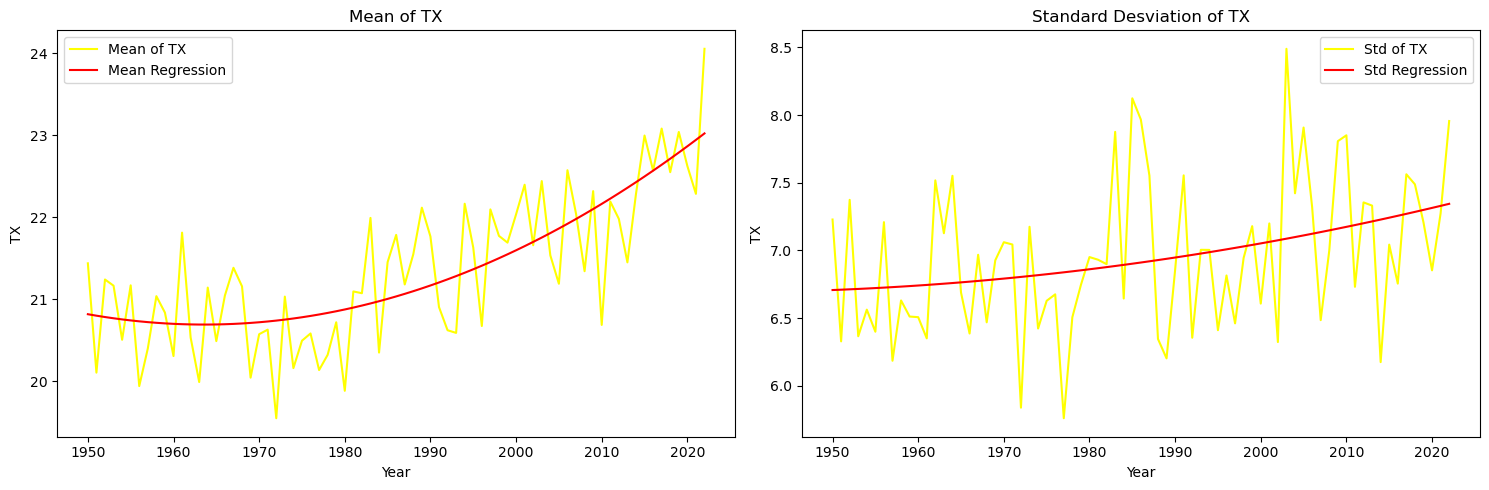

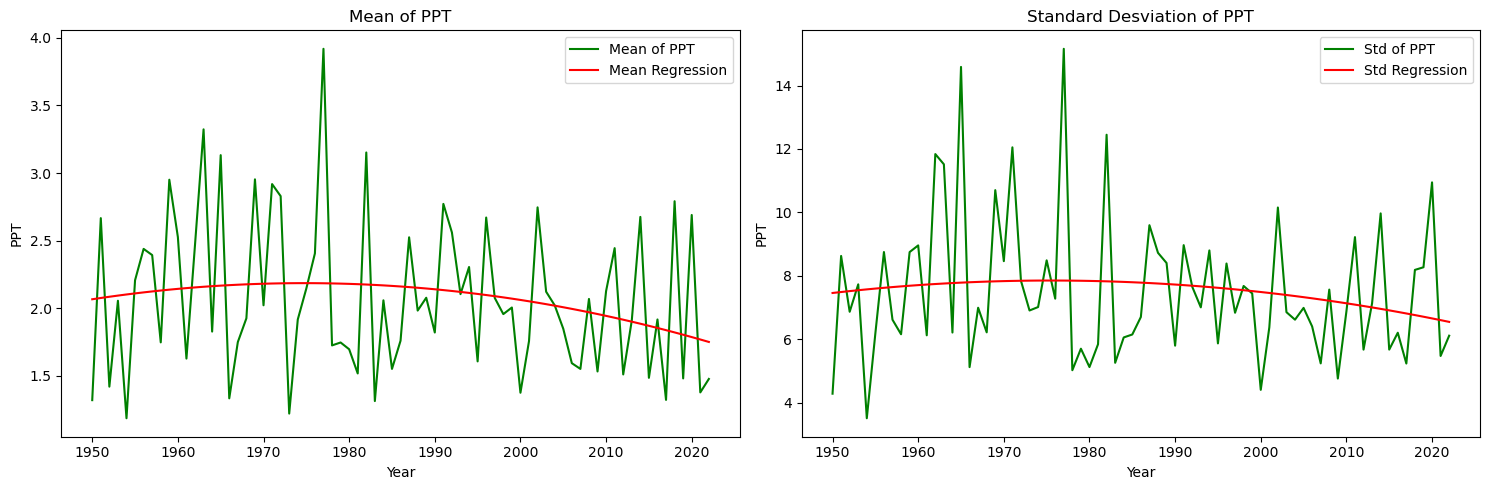

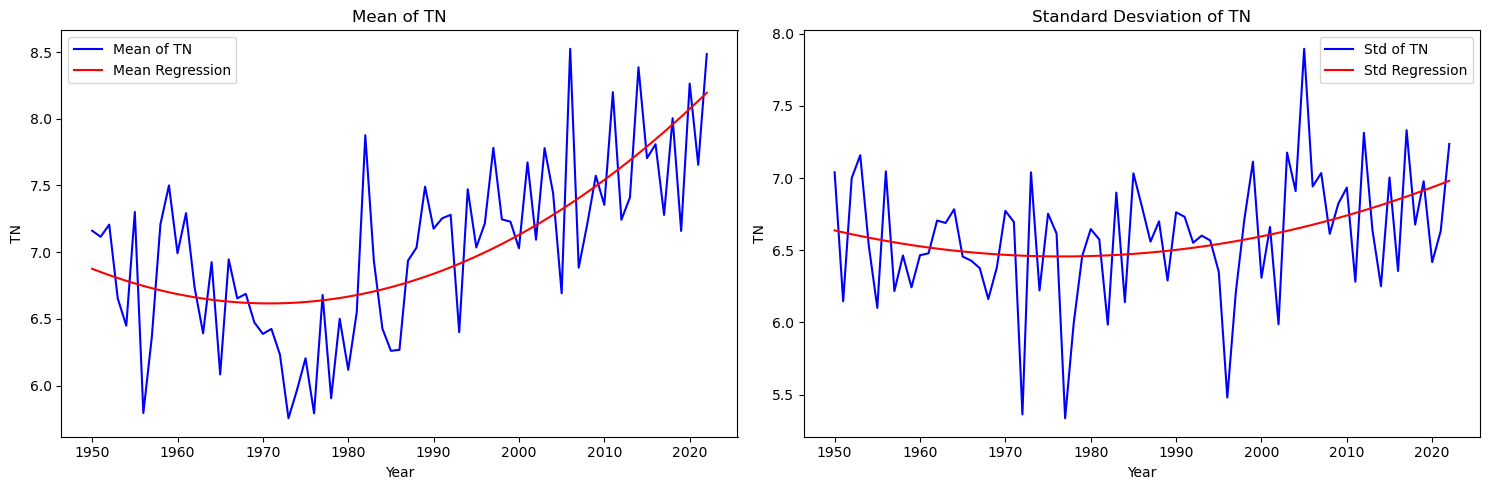

In [7]:
variables_to_plot = ['TX', 'PPT', 'TN'] 
colors = ['yellow', 'green', 'blue']

for idx, variable in enumerate(variables_to_plot):
    plot_mean_and_std_of(variable, colors[idx])

#### Interpretació de resultats: 
- La temperatura màxima diara mitjana dels anys ha anat augmentant amb el temps.  
- També ho ha fetla temperatura diaria mínima mitjana de cada any.
- Amb les precipitacions mitjanes anuals no s'aprecia una tendencia a pujar ni a baixar.

#### Exercici 2. (10 punts)

##### Anomalía mensual

- executa aquest codi i comenta què fa i com ho fa

- fes una taula amb la mitjana, variança i desviació standard de l'anomalía de les tres variables en els dos períodes (<1990 i >=1990); interpreta els resultats i comenta-ho breument.

In [8]:
df = raw_data

In [9]:
# Agrupem per la columna MES i en calculem la mitjana de la columna TX, llavors tenim la mitjana de TX per cada mes
df.groupby('MES').TX.mean()

MES
1     13.469686
2     14.659069
3     17.030004
4     19.246895
5     23.140389
6     27.429772
7     30.601237
8     30.132612
9     26.739041
10    22.219576
11    17.030731
12    13.924834
Name: TX, dtype: float64

In [10]:
# Ho convertim a dataframe i fem servir el iterrows() per iterar sobre el dataframe que s'ha creat, seríen els valors que
# surten a dalt.
df.groupby('MES').TX.mean().to_frame().iterrows()

<generator object DataFrame.iterrows at 0x000001FC135446A0>

In [11]:
for element in df.groupby('MES').TX.mean().to_frame().iterrows(): 
    print(element)

(1, TX    13.469686
Name: 1, dtype: float64)
(2, TX    14.659069
Name: 2, dtype: float64)
(3, TX    17.030004
Name: 3, dtype: float64)
(4, TX    19.246895
Name: 4, dtype: float64)
(5, TX    23.140389
Name: 5, dtype: float64)
(6, TX    27.429772
Name: 6, dtype: float64)
(7, TX    30.601237
Name: 7, dtype: float64)
(8, TX    30.132612
Name: 8, dtype: float64)
(9, TX    26.739041
Name: 9, dtype: float64)
(10, TX    22.219576
Name: 10, dtype: float64)
(11, TX    17.030731
Name: 11, dtype: float64)
(12, TX    13.924834
Name: 12, dtype: float64)


In [12]:
# Llavors creem un diccionari amb el fent servir la info del mes (primer element de la tupla i x, l'últim). 
# Per tant, tenim un diccionari on guardem el número del mes i la mitjana de TX
M_TX = {'%02d' %mes: x.item() for mes, x in  df.groupby('MES').TX.mean().to_frame().iterrows()}
M_TX

{'01': 13.469686257180735,
 '02': 14.659068865179437,
 '03': 17.03000441891295,
 '04': 19.24689497716895,
 '05': 23.14038886433937,
 '06': 27.429771689497716,
 '07': 30.60123729562528,
 '08': 30.132611577551923,
 '09': 26.73904109589041,
 '10': 22.219575784357048,
 '11': 17.030730593607306,
 '12': 13.924834290764473}

In [13]:
# Per tant, creem un diccionari amb valor, numero de mes i clau mitjana de cada variable
M_TX = {'%02d' %mes: x.item() for mes, x in  df.groupby('MES').TX.mean().to_frame().iterrows()}
M_TN = {'%02d' %mes: x.item() for mes, x in  df.groupby('MES').TN.mean().to_frame().iterrows()}
M_PPT = {'%02d' %mes: x.item() for mes, x in  df.groupby('MES').PPT.mean().to_frame().iterrows()}

In [14]:
# Per les tres primeres linies de codi, creem una nova columna per cada columna (TX, TN, PPT).
# Per fer-ho iterem per cada fila amb el metode .apply amb el parametre axis = 1

# Llavors per saber el nou valor de cada fila (de la nova columna que estem creant 'TX_anomaly', 'TN_anomaly', 'PPT_anomly'),
# la funció apply ens permet passar-li una funció la qual el seu resultat serà el que s'haurà d'insertar a la cela anomenada

# el metode apply, internament fa un bulce i com que especifiquem axis = 1, tenim tots els valors de la fila els quals, 
# podem passar per parametre. Per això podem fer row.TX i serà el TX de cada iteració.

In [15]:
# Per exemple quan s'iteres amb el metode apply, tindriem algo així
row = df.iloc[0]
row

ANY    1950.0
MES       1.0
DIA       1.0
PPT       0.0
TX       12.7
TN        5.2
Name: 0, dtype: float64

In [16]:
row.TX

12.7

In [17]:
row.MES

1.0

In [18]:
# Després el que necessitem entrendre és: 
M_TX['%02d' %row.MES]

# estem anant al diccionari que hem creat abans i anem a buscar el valor del mes corresponent (el de la iteració que fem)

13.469686257180735

In [19]:
# Per tant, el valor que estem guardant és la resta de cada TX amb la mitjana d'aquell mes
# Per tant a *_anomaly, tenim la desviació respecte la mitjana de cada valor (quan es separa cada valor respecte la mitjana)
df['TX_anomaly'] = df.apply(lambda row: row.TX -M_TX['%02d' %row.MES], axis = 1)

In [20]:
df['TX_anomaly'] = df.apply(lambda row: row.TX -M_TX['%02d' %row.MES], axis = 1)
df['TN_anomaly'] = df.apply(lambda row: row.TN -M_TN['%02d' %row.MES], axis = 1)
df['PPT_anomaly'] = df.apply(lambda row: row.PPT -M_PPT['%02d' %row.MES], axis = 1)

# A dia, afegim si l'any és més petit o major igual al 1990, això ho fem insertant un text si el valor 'x', que és
# df.ANY de cada iteració, si aquest és més petit que 1990
df['period'] = df.ANY.apply(lambda x: '<1990' if x < 1990 else '>=1990')

In [21]:
# Veiem com s'han afegit les columnes, cada dia te *_anomaly que es la resta de cada columna (*) menys la mitjana d'aquesta
# variable i el valor period
df

,ANY,MES,DIA,PPT,TX,TN,TX_anomaly,TN_anomaly,PPT_anomaly,period
0,1950,1,1,0.0,12.7,5.2,-0.769686,5.952894,-1.687185,<1990
1,1950,1,2,0.0,13.2,-2.5,-0.269686,-1.747106,-1.687185,<1990
2,1950,1,3,0.0,14.8,-1.8,1.330314,-1.047106,-1.687185,<1990
3,1950,1,4,0.0,15.4,0.5,1.930314,1.252894,-1.687185,<1990
4,1950,1,5,0.0,15.7,-1.8,2.230314,-1.047106,-1.687185,<1990
...,...,...,...,...,...,...,...,...,...,...
26658,2022,12,27,0.0,18.5,0.2,4.575166,0.097879,-1.953336,>=1990
26659,2022,12,28,0.0,19.7,-0.4,5.775166,-0.502121,-1.953336,>=1990
26660,2022,12,29,0.0,17.0,0.6,3.075166,0.497879,-1.953336,>=1990
26661,2022,12,30,0.0,17.5,4.5,3.575166,4.397879,-1.953336,>=1990


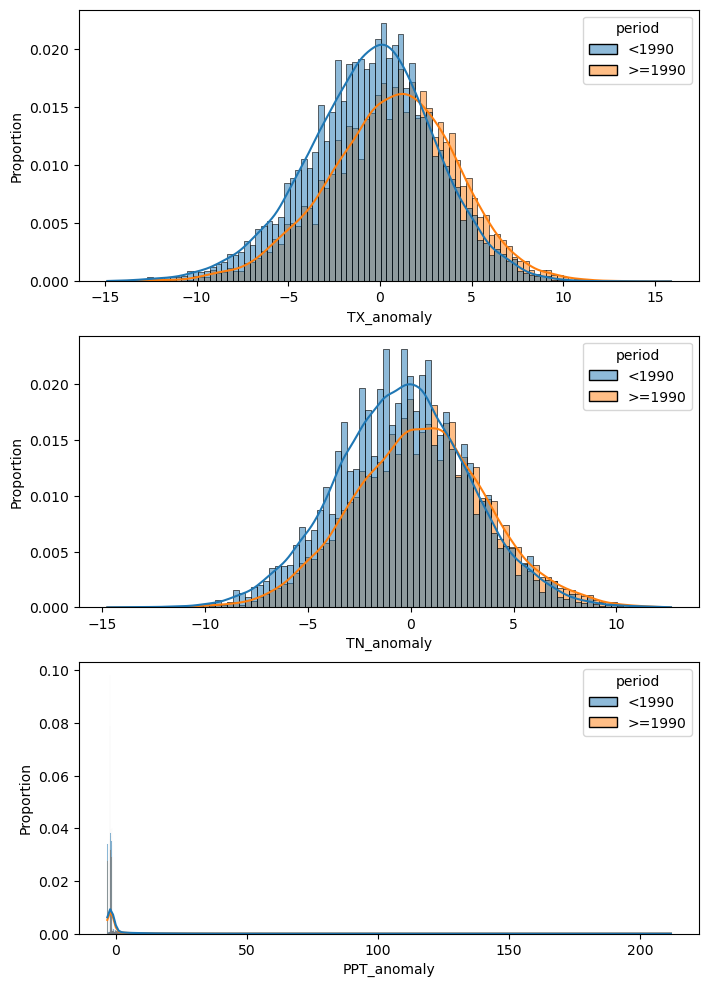

In [22]:
# Crear un plot amb tres histogrames
# kde = True -> És el parametre per calcular la pdf que apareix a cada plot, es fa servir per suavitzar la curva
# stat='proportion' -> histograma de proporcions, la suma de totes les barres serà 1, tenim les barres normalitzades
# hue = 'period' -> es fa servir per diferenciar els elements dins el histograma, separa amb dos categories (les que surten a la llegenda)
# x = 'TX_anomaly' -> Nom que apareix al eix X
# data = df -> Dades que es fan servir per crear els histogrames

fig, axs = plt.subplots(3, 1, figsize = (8, 12))
sns.histplot(ax = axs[0], data = df, x = 'TX_anomaly', hue = 'period', stat = 'proportion', kde = True)
sns.histplot(ax = axs[1], data = df, x = 'TN_anomaly', hue = 'period', stat = 'proportion', kde = True)
sns.histplot(ax = axs[2], data = df, x = 'PPT_anomaly', hue = 'period', stat = 'proportion', kde = True);

fes una taula amb la mitjana, variança i desviació standard de l'anomalía de les tres variables en els dos períodes (<1990 i >=1990); interpreta els resultats i comenta-ho breument.

In [23]:
# Fem un df separat per els que compleixen cada condició
period_menor_1990 = df[df['period'] == '<1990']
period_major_1990 = df[df['period'] == '>=1990']

# Crear una taula amb la mitjana, variança i desviació estandard per cada periode
taula = pd.DataFrame({
    '<1990_Mean': period_menor_1990[['TX_anomaly', 'TN_anomaly', 'PPT_anomaly']].mean(),
    '>=1990_Mean': period_major_1990[['TX_anomaly', 'TN_anomaly', 'PPT_anomaly']].mean(),
    '<1990_Var': period_menor_1990[['TX_anomaly', 'TN_anomaly', 'PPT_anomaly']].var(),
    '>=1990_Var': period_major_1990[['TX_anomaly', 'TN_anomaly', 'PPT_anomaly']].var(),
    '<1990_Std.': period_menor_1990[['TX_anomaly', 'TN_anomaly', 'PPT_anomaly']].std(),
    '>=1990_Std.': period_major_1990[['TX_anomaly', 'TN_anomaly', 'PPT_anomaly']].std()
})

taula

,<1990_Mean,>=1990_Mean,<1990_Var,>=1990_Var,<1990_Std.,>=1990_Std.
TX_anomaly,-0.526681,0.638415,12.358219,12.688672,3.515426,3.562116
TN_anomaly,-0.380094,0.460730,10.808504,10.844202,3.287629,3.293054
PPT_anomaly,0.068952,-0.083580,68.543273,52.973437,8.279086,7.278285


Recordem que *_anomally és la desviació respecte la mitjana de cada valor (quan es separa cada valor respecte la mitjana), llavors hem fet la mitjana, variança i desviació estandard d'aquests valors

TX
- Abans de 1990 tenim una mitjana negativa, això vol dir que la majoria de valors eren més petits que la mitjana. 
- A partir de 1990 és un valor positiu, llavors la temperatura maxima diaria mitjana al llarg del any ha augmentat perque tenim un valor positiu (la majoria de valors són més grans que la mitjana).

TN
- Tenim el mateix que per 'TX'.
- Això significa que les temperatures extremes s'han anat incrementant al llarg dels anys (temperatures màximes cada cop majors i temperatures mínimes cada cop menors també). 

PPT
- Abans del 1990, la mitjana de les desviacions era positiva i després negativa, el que vol dir que cada cop està ploguent menys (ja que si la mitjana és 10 i abans havia plogut 12 (numero positiu) i avui en dia ha plogut 8 (numero negatiu)). 

CONCLUSIONS FINALS: 
- Podem concloure que al llarg dels últims anys, les temperatures cada cop són més extremes (temperatures més fredes a l'hivern i temperatures més altres a l'estiu). 
- També podem apreciar que cada cop plou menys en comparació anys passats. 
- Les teoríes del canvi climatic són correctes!

#### Exercici 3. (10 punts)
- fes una figura que mostri la distribució (pdf i cdf) de l'anomalía per les tres variables en els dos períodes considerats (6 plots)
- en base a aquestes dades:
    - quína és la probabilitat de tenir una temperatura màxima superior a la mitjana (anomalía positiva) en cada període?
    - quína és la probabilitat de tenir una anomalía de precipitació superior als 100mm en cada període?
    - compara els valors i comenta-ho breument

In [24]:
period_menor_1990.TX_anomaly

0       -0.769686
1       -0.269686
2        1.330314
3        1.930314
4        2.230314
           ...   
14605   -0.824834
14606   -2.824834
14607   -2.824834
14608   -1.824834
14609   -1.324834
Name: TX_anomaly, Length: 14610, dtype: float64

In [25]:
period_menor_1990[['TX_anomaly']]

,TX_anomaly
0,-0.769686
1,-0.269686
2,1.330314
3,1.930314
4,2.230314
...,...
14605,-0.824834
14606,-2.824834
14607,-2.824834
14608,-1.824834


In [26]:
def print_pdf_cdf(col):
    fig, axs = plt.subplots(1, 2, figsize=(18, 5))
    
    # sns.kdeplot espera com a parametre data un DataFrame, per això ho hem de posar entre doble [[]],
    # Amb nomès un [] es genera un Pandas series
    sns.kdeplot(ax=axs[0], data=period_menor_1990[[col]], x=col, bw_adjust = 0.2, color='red', label='<1990')
    sns.kdeplot(ax=axs[0], data=period_major_1990[[col]], x=col, bw_adjust = 0.2, color='blue', label='>=1990')
    axs[0].set_title('pdf')
    axs[0].legend()

    sns.kdeplot(ax=axs[1], data=period_menor_1990[[col]], x=col, bw_adjust=0.2, cumulative=True, color='red', label='<1990')
    sns.kdeplot(ax=axs[1], data=period_major_1990[[col]], x=col, bw_adjust=0.2, cumulative=True, color='blue', label='>=1990')
    axs[1].set_title('cdf')
    axs[1].legend()
    
    plt.suptitle(f'Comparació de {col} entre <1990 i >=1990', fontsize=16)
    plt.tight_layout()
    plt.show()

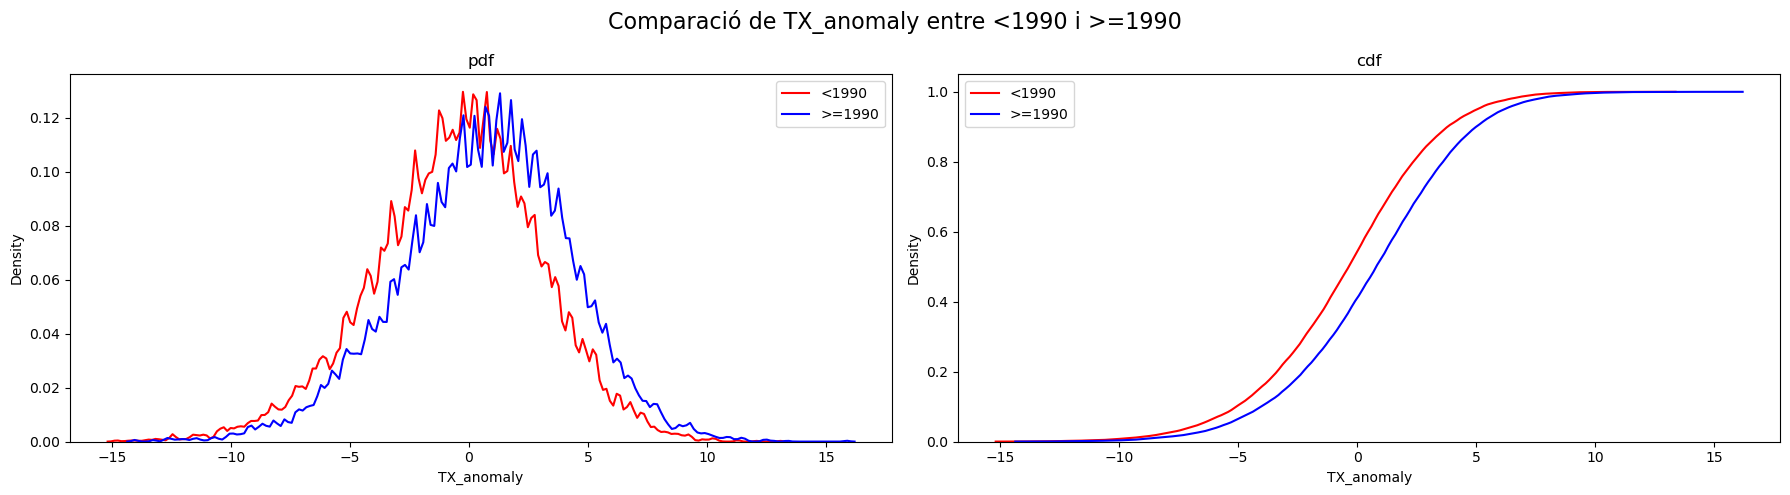

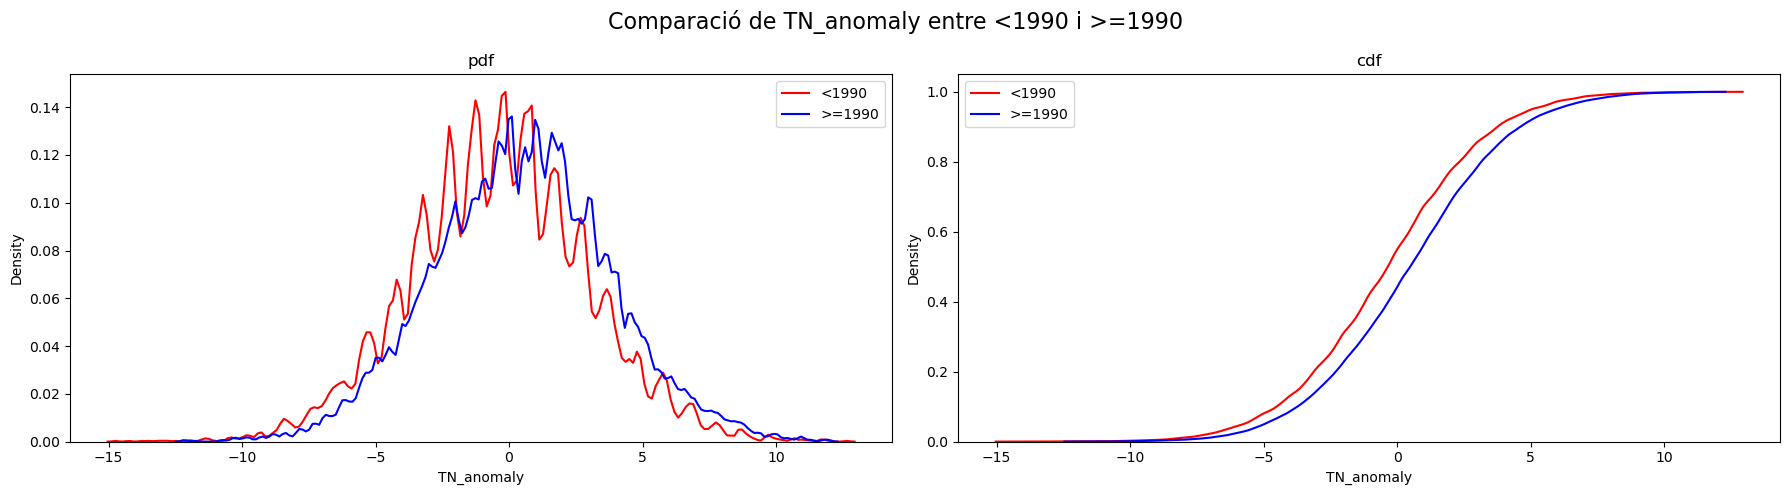

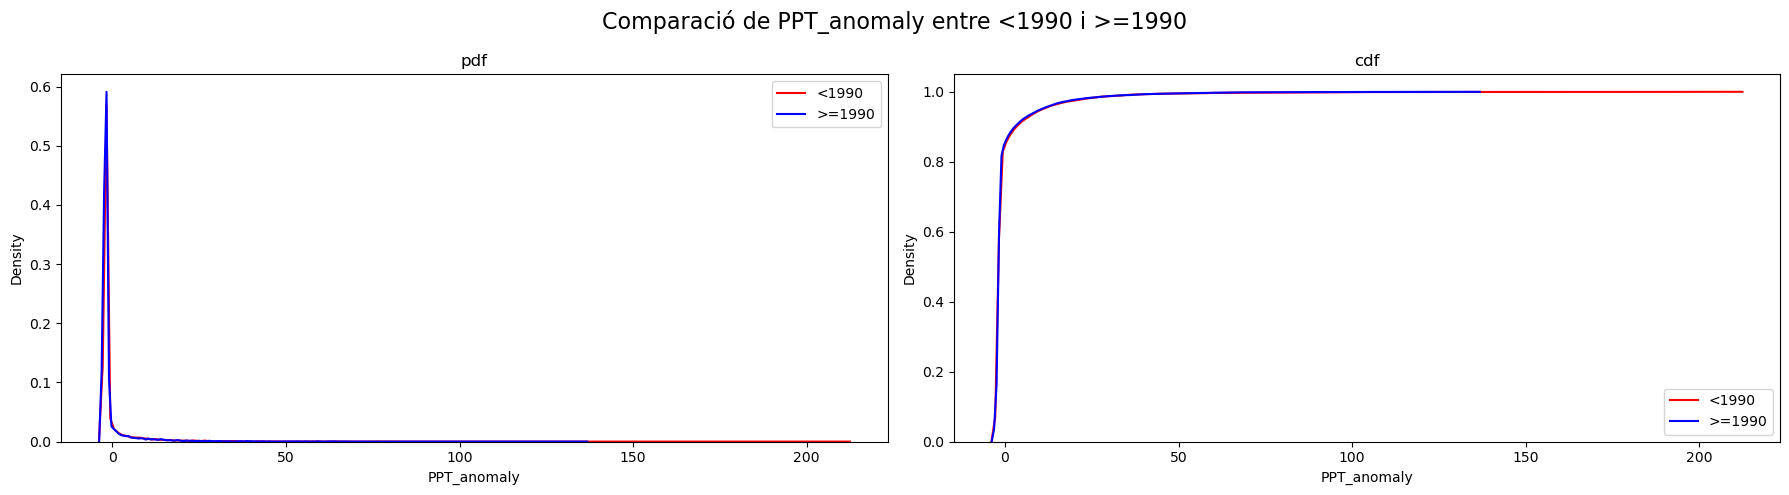

In [27]:
for column in ['TX_anomaly','TN_anomaly','PPT_anomaly']: 
    print_pdf_cdf(column)

### Per fer càlculs, necessitem tenir la funció, ho fem amb sklearn
- Codi de la funció `calculate_bin_pdf_cdf_relation` copiat dels apunts

In [28]:
def calculate_bin_pdf_cdf_relation(info):
    data, bandwidth = info, 0.2
    kde = KernelDensity(kernel = 'gaussian', bandwidth = bandwidth).fit(np.array(data)[:, None])
    bin_width = 0.5
    bins = np.round(np.arange(data.min() -0.4, data.max() +0.4, step = bin_width), 2)
    pdf = np.exp(kde.score_samples(bins[:, None]))
    cdf = np.cumsum(pdf *bin_width)
    return pd.DataFrame(np.stack((bins, pdf, cdf)).T, columns = ['bin', 'pdf', 'cdf'])

In [29]:
predict = calculate_bin_pdf_cdf_relation(period_menor_1990.TN_anomaly)

In [30]:
predict.head(4)

,bin,pdf,cdf
0,-15.15,0.000018,0.000009
1,-14.65,0.000139,0.000079
2,-14.15,0.000141,0.000149
3,-13.65,0.000218,0.000258


In [31]:
mean_TX = period_menor_1990['TX_anomaly'].mean()
idx_bin_proper = np.argmin(np.abs(predict['bin'] - mean_TX))

In [32]:
# Tenir una temperatura superior sería:
1 -predict.loc[idx_bin_proper, 'cdf']

0.5049042508328173

#### Fem el mateix però amb l'altre periode: 

In [33]:
predict = calculate_bin_pdf_cdf_relation(period_major_1990.TN_anomaly)
idx_bin_proper = np.argmin(np.abs(predict['bin'] - period_major_1990['TX_anomaly'].mean()))
1 -predict.loc[idx_bin_proper, 'cdf']

0.4756015305117782

El mateix però amb la prescipitació: 
- quína és la probabilitat de tenir una anomalía de precipitació superior als 100mm en cada període?

In [34]:
predict = calculate_bin_pdf_cdf_relation(period_menor_1990.PPT_anomaly)
idx_bin_proper = np.argmin(np.abs(predict['bin'] - 100))
1 -predict.loc[idx_bin_proper, 'cdf']

0.010065438438550012

In [35]:
predict = calculate_bin_pdf_cdf_relation(period_major_1990.PPT_anomaly)
idx_bin_proper = np.argmin(np.abs(predict['bin'] - 100))
1 -predict.loc[idx_bin_proper, 'cdf']

0.009805870602292766

- Com podem observar, són valors molt petits, per tant no hi haurà gairabé probabilitats de que passi
- Com podiem veure, correspon amb el que habíem trobat a les gràfiques, ja que el més normal (dins de les anomalies) es que tota la presipitació s'agrupes entre 0 i poc (molt menys de 50 i encara menys 100).